In [113]:
graph = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
graph1 = [(graph[i][0]+4, graph[i][1]+4) for i in range(len(graph))]
graph2 = [(graph1[i][0]+4, graph1[i][1]+4) for i in range(len(graph1))]
graph +=graph1+graph2
graph+=[(4, 8), (8,12), (4, 12)]

In [114]:
adj = []
for i in range(12):
  adj.append([0.]*12)
for edge in graph:
  i = edge[0]-1
  j = edge[1]-1
  adj[i][j] = 1.
  adj[j][i] = 1.
print(adj)

[[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]]


In [115]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
grph = np.array(adj)
def graph_visualize(embs, graph):
  for i in range(len(graph)):
    for j in range(i+1, len(graph)):
      if graph[i][j] == 1:
        xs = [embs[i][0], embs[j][0]]
        ys = [embs[i][1], embs[j][1]]
        plt.plot(xs, ys, marker = 'o')
  plt.show()

In [116]:
import math
class DistanceEmbedding:
  def __init__(self, graph, dim, eps=0.0001):
    '''
    graph:numpy array is adjacency matrix for graph
    '''
    self.graph = graph
    self.n = len(graph)
    self.eps = eps
    self.f_large_c = -math.e ** (-eps-1)
    self.f_small_c = self.f_large_c / (eps + 1)
    bounds = self.n ** (1 / dim)
    self.embeddings = np.random.uniform(-bounds, bounds, (self.n, dim))
    self.emb_grad = np.zeros(self.embeddings.shape)

  def forward(self):
    self.distances = np.empty(self.graph.shape)
    loss = 0
    for i in range(self.n):
      for j in range(i + 1, self.n):
        dist = self.distance(self.embeddings[i], self.embeddings[j])
        loss += self.loss(dist, self.graph[i][j])
        self.distances[i][j] = dist
        self.distances[j][i] = dist
    return loss

  def backward(self):
    back_distances = None
    for i in range(self.n):
      for j in range(i + 1, self.n):
        x = self.distances[i][j]
        if self.graph[i][j]:
          back_distances = (0.5+self.sign(self.f_large(x))) * (math.e**(x-2))
        else:
          back_distances = (0.5+self.sign(self.f_small(x))) * -(1 + 1 / x) / ((math.e**x)*x)

        emb = (self.embeddings[i]-self.embeddings[j]) / self.distances[i][j] * back_distances
        self.emb_grad[i] += emb
        self.emb_grad[j] -= emb
  def step(self, l_r):
    self.embeddings -= l_r * self.emb_grad

  def zero_grad(self):
    self.emb_grad = np.zeros(self.emb_grad.shape)

  def loss(self, x, c):
    return max((1 - c) * self.f_small(x), c * self.f_large(x))

  def f_small(self, x):
    return 1 / (x * (math.e ** x)) + self.f_small_c

  def f_large(self, x):
    return math.e ** (x - 2) + self.f_large_c

  @staticmethod
  def distance(x, y):
    return np.sum((x-y)**2)**0.5

  @staticmethod
  def sign(x):
    if x < 0:
      return -1.
    if x > 0:
      return 1
    return 0


510.37551156590314


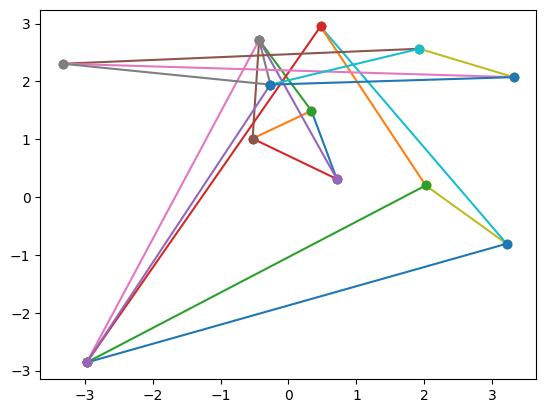

In [117]:
distEmb = DistanceEmbedding(grph, 2, eps=0.7)
print(distEmb.forward())
start_emb = distEmb.embeddings
graph_visualize(start_emb, grph)

510.37551156590314
25.197878622537036
20.60879122060292
18.796576242072657
17.398443996545552
16.292119481054065
15.395563706125714
14.688498114059323
14.11533613486844
13.640399852251011
13.232468704363537
12.875448038859414
12.557553587664824
12.26969467299096
12.00136474189437
11.745645452763034
11.497767845935858
11.253988871854371
11.007782830629191
10.75592063188083
10.49614374326455
10.227254675524707
9.949224416584782
9.66235200843929
9.3690738162198
9.071827805133939
8.78379894972045
8.495663159275182
8.208741840974042
7.924095977733041
7.642512874337258
7.364544689485058
7.090574282879655
6.820888243983317
6.555742850375561
6.296403012197259
6.043658671707626
5.795871730923052
5.554570496286811
5.319352348287085
5.095025602453718
4.8819557811210865
4.678941433838134
4.49279810479125
4.31475368880893
4.144395141251258
3.979600075530792
3.8229163662014867
3.6730112194133335
3.529567255474925
3.3925496211366886
3.2616655064082085
3.1415764147762824
3.035277974904825
2.9387113717

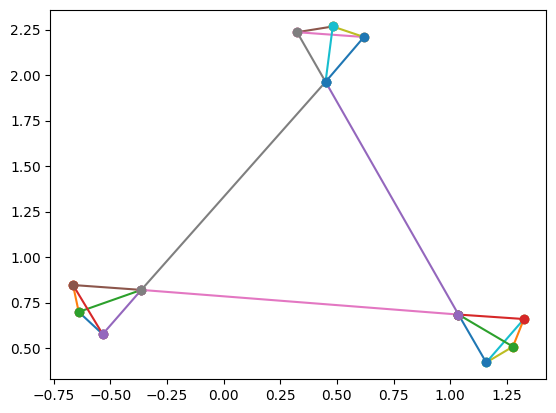

In [118]:
l_r = 0.01
for i in range(1000):
  loss = distEmb.forward()
  distEmb.backward()
  distEmb.step(l_r)
  distEmb.zero_grad()
  print(loss)
end_emb = distEmb.embeddings
graph_visualize(end_emb, grph)